In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

### Retrieve the nyc price sample data set from weights and biases

In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sabarimooc. Use `wandb login --relogin` to force relogin


### Sample nyc data

In [3]:
import ydata_profiling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# show the data sample
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### EDA report for the nyc airbnb sample data

In [5]:
# pandas profiling 
from ydata_profiling import ProfileReport
profile = ProfileReport(df)

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/sagemaker-user/.conda/envs/nyc_airbnb_dev/lib/python3.9/site-packages/ydata_profiling/model/typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
/home/sagemaker-user/.conda/envs/nyc_airbnb_dev/lib/python3.9/site-packages/ydata_profiling/model/typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
/home/sagemaker-user/.conda/envs/nyc_airbnb_dev/lib/python3.9/site-packages/ydata_profiling/model/typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdt.is_categorical_dtype(series):
/home/sagemaker-user/.conda/envs/nyc_airbnb_dev/lib/python3.9/site-packages

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Image plot explains missing values in each variable

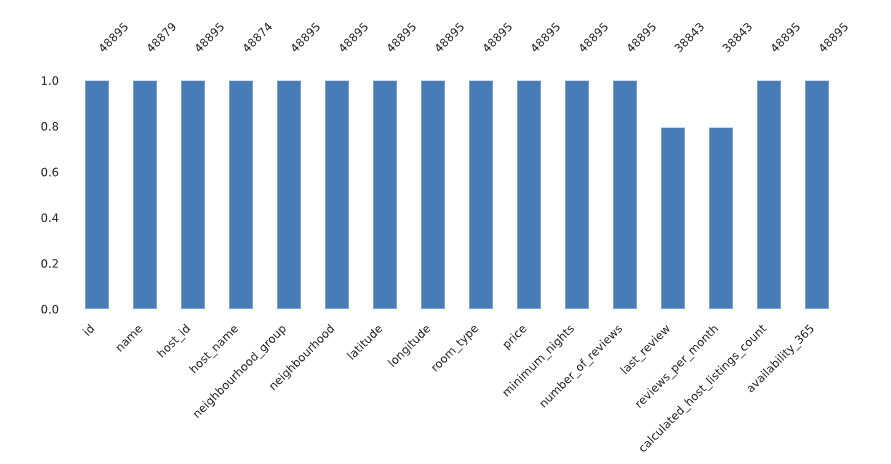

## EDA highlight
    - last_review has 10052 (20.6%) missing values
    - reviews_per_month has 10052 (20.6%) missing values
    - last_review is of object type vs. date type
    - prices has significant outliers - see below

In [8]:
 # created distibution, this shows the skewed nature of the price variable
fig = plt.figure(figsize =(10, 7))
plt.hist(df['price'], bins = 50 , color = 'blue', edgecolor = 'black')
plt.show()

In [9]:
# Drop outliers, consider pricing between 10 and 350 dollars
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [10]:
# clean price variable after removing outliers.
fig = plt.figure(figsize =(10, 7))
plt.hist(df['price'], bins = 50 , color = 'blue', edgecolor = 'black')
plt.show()

In [11]:
# check whether the process was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46428 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46428 non-null  int64         
 1   name                            46413 non-null  object        
 2   host_id                         46428 non-null  int64         
 3   host_name                       46407 non-null  object        
 4   neighbourhood_group             46428 non-null  object        
 5   neighbourhood                   46428 non-null  object        
 6   latitude                        46428 non-null  float64       
 7   longitude                       46428 non-null  float64       
 8   room_type                       46428 non-null  object        
 9   price                           46428 non-null  int64         
 10  minimum_nights                  46428 non-null  int64         
 11  number_

In [12]:
# finish weights and biases run
run.finish()